### Project_Summary

**Part-1**

**Domain: Automobile**

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5  continuous attributes 

The purpose is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’ 

The dataset contains the below features:

1. mpg: continuous, 2. cylinders: multi-valued discrete, 3. displacement: continuous, 4. horsepower: continuous, 5. weight: continuous, 6. acceleration: continuous, 7. model year: multi-valued discrete, 8. origin: multi-valued discrete, 9. car name: string (unique for each instance) 

Tasks performed:

1. Importing and cleaning the data
2. Data analysis and visualisation
3. Data preprocessing
4. ML model (Different clustering methods)
5. Conclusion

===============================================================================================

**Part-2**

The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles 
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars.
All the features are numeric i.e. geometric features extracted from the silhouett

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
The vehicle may be viewed from one of many different angles


Tasks performed:

1. Importing and cleaning the data
2. EDA and visualisation
3. Design an SVM classifier using all the data
4. Perform Dimensional reduction on the data
5. Design and train a best fit SVM classier using dimensionally reduced attributes.
6. Conclusion


In [791]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from PIL import Image

## Importing the datasets

In [792]:
#loading the datasets and checking the shape
df1=pd.read_csv("Part1 - Car name.csv")
df1_1=pd.read_json("Part1 - Car-Attributes.json")

In [793]:
print("csv file shape:",df1.shape,"and size:", df1.size)
print("json file shape:",df1_1.shape,"and size:", df1_1.size)

csv file shape: (398, 1) and size: 398
json file shape: (398, 8) and size: 3184


Both the datasets have 398 rows

In [794]:
#merging two datasets
df_mpg=df1_1.join(df1)
print(df_mpg.head())

    mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino


In [795]:
#shape and size of new dataset
print(df_mpg.shape)
print(df_mpg.size)

(398, 9)
3582


Now the car name column is added to the data set

In [796]:
#Save the dataset to .csv, .json and .excel format files for future use
df_mpg.to_json("mpg_ds_After_merge.json")
df_mpg.to_csv("mpg_ds_After_merge.csv",index=False)
df_mpg.to_excel("mpg_ds_After_merge.xlsx",index=False)

In [797]:
#Reading the saved file and verifying the data
pd.read_csv("mpg_ds_After_merge.csv").head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [798]:
#Reading the saved file and verifying the data
pd.read_json("mpg_ds_After_merge.json").head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [799]:
#Reading the saved file and verifying the data
pd.read_excel("mpg_ds_After_merge.xlsx").head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Data cleansing

In [800]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


From the above info, it can be observed that hp is of object type, which means there must be some NA values in that column. So we have to check those and correct.

In [801]:
df_mpg.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [802]:
#Checking any null values in the hp column
df_mpg.hp.isnull().value_counts()

False    398
Name: hp, dtype: int64

There are no null values in the hp column

In [803]:
#Checking all hp values are digits
df_mpg[(df_mpg['hp'].str.isdigit()==False)]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


It is observed that there are 6 rows with hp as '?'. These rows can be removed or the 'hp' value can be given median or mean value

In [804]:
#Replacing the '?' values with NA to use fillna function
df_mpg = df_mpg.replace('?', np.nan)

In [805]:
#Removing the unwanted columns
df_mpg=df_mpg.drop(["car_name", "origin"],axis=1)

Year column too can be dropped as it is just the year it was manufactured, but the technology with later years may be advanced, so keeping the year column for now. 

In [806]:
replace_median = lambda x: x.fillna(x.median())#To replace Na with median
df_mpg = df_mpg.apply(replace_median,axis=0) #Applying on each column
df_mpg['hp'] = df_mpg['hp'].astype('float') #Changing the type to float as it was object

Now all the na values are replaced with median

## Statistical Analysis

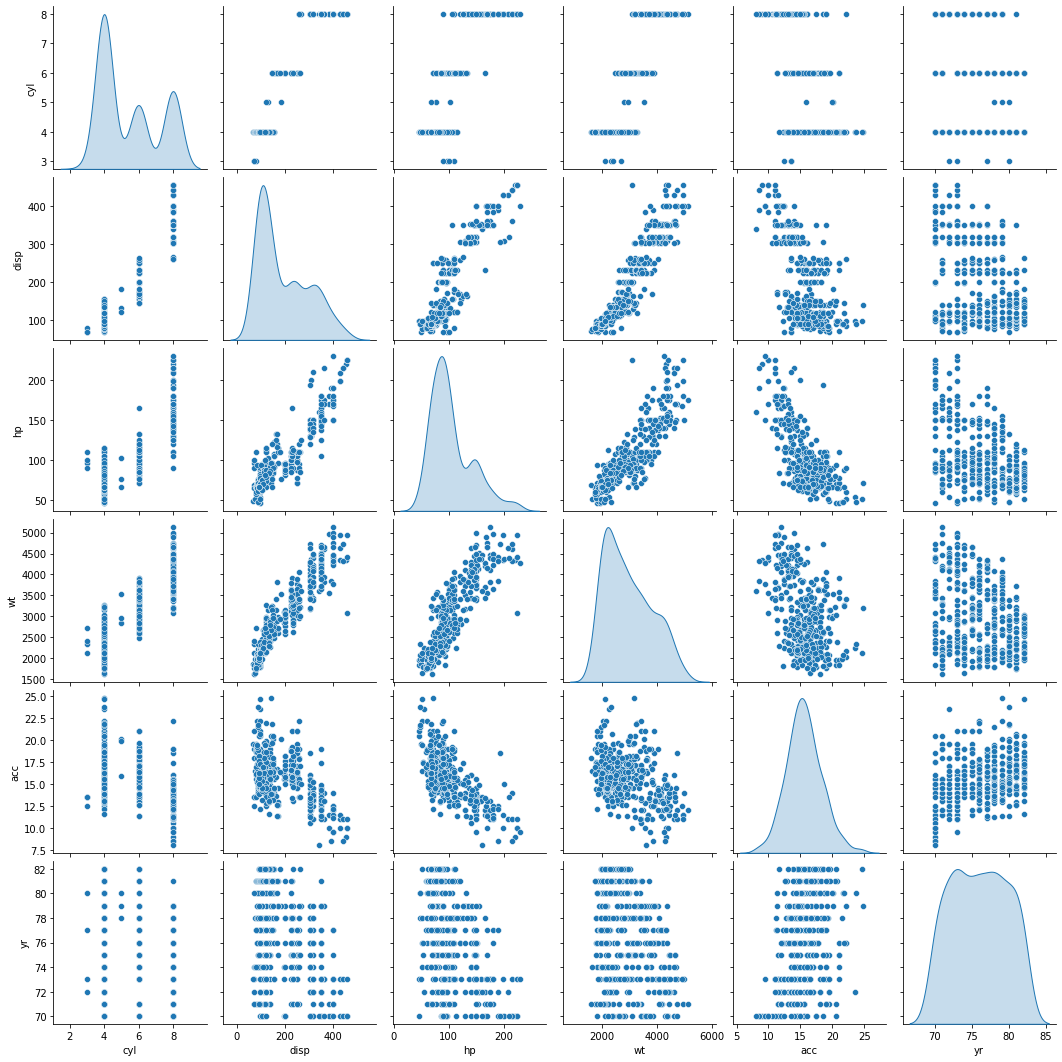

In [807]:
# mpg is dependent variable , so dropping
X = df_mpg.drop(['mpg'], axis=1)

y = df_mpg[['mpg']]

sns.pairplot(X, diag_kind='kde') 

Based on the pair plot, it can be observed that 3 clusters may be formed.

There is also linear correlation between some components like hp and weight, weight and disp, acc and hp, hp and disp

## Applying K Means and Hierarchical clustering

In [808]:
# Standardising the data before applying clustering
X1 = pd.DataFrame(StandardScaler().fit_transform(X))
X1.columns=X.columns
X1.shape

(398, 6)

**K Means**

In [809]:
#Finding the optimal number of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X1)
    prediction=model.predict(X1)
    meanDist.append(sum(np.min(cdist(X1, model.cluster_centers_, 'euclidean'), axis=1)) / X1.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

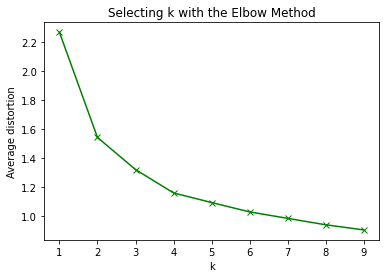

In [810]:
plt.plot(clusters, meanDist, 'gx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

From the above elbow diagram, it is not very clear but after 3 clusters, reduction in distortion is less. So 3 clusters are taken.

In [811]:
# Let us first start with K = 3
K_model=KMeans(3)
K_model.fit(X1)
prediction=K_model.predict(X1)

#Append the prediction 
X1["GROUP"] = prediction
X["GROUP"] = prediction
X.head()

,cyl,disp,hp,wt,acc,yr,GROUP
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [812]:
X_clust = X.groupby(['GROUP'])
X_clust.mean()

,cyl,disp,hp,wt,acc,yr
GROUP,,,,,,
0,6.161290,223.881720,102.155914,3239.967742,16.378495,76.172043
1,8.000000,349.705263,162.105263,4154.526316,12.604211,73.526316
2,3.990476,109.240476,79.107143,2315.390476,16.550000,77.061905


From the above info, it can be said that:

Group 2 has all least values except acceleration

Group 1 has all heighest values except acceleration

Group 0 has moderate values for all variables

**Hierarchical clustering**

In [813]:
X_agg=X.drop('GROUP',axis=1)
X1_agg=X1.drop('GROUP',axis=1)

In [814]:
Agg_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
Agg_model.fit(X1_agg)
X_agg['labels'] = Agg_model.labels_
X_agg.head(10)
X_agg_clust = X_agg.groupby(['labels'])
X_agg_clust.mean()

,cyl,disp,hp,wt,acc,yr
labels,,,,,,
0,4.620339,143.116949,86.030508,2585.061017,16.421356,76.742373
1,8.000000,346.626263,160.353535,4128.393939,12.694949,73.696970
2,4.000000,112.000000,64.750000,2731.250000,23.750000,79.250000


In [815]:
#linkage gives the dendrogram
Z = linkage(X1_agg, metric='euclidean', method='average')

#pdist gives the all pairwise distances among the points
c, coph_dists = cophenet(Z , pdist(X1_agg)) 
#cophenet index is correlation between the direct euclidian distance and dendrogram distance

#Closer it is 1, good the clustering is
c

0.806660088032498

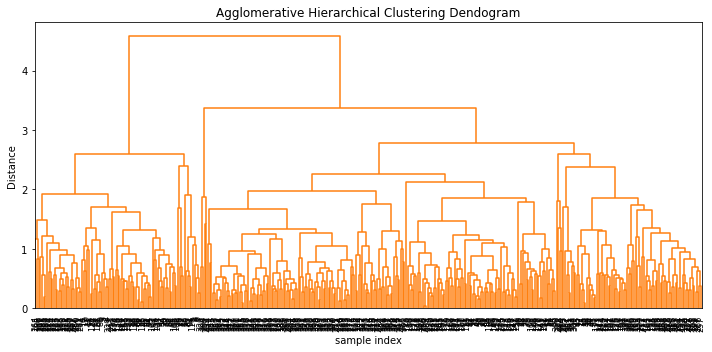

In [816]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In K means, number of clusters can be tried multiple values and by elbow method or other means, Optimal number of clusters will be choosen when there is minumum reduction in distortion with the increment in cluster number.

In Hierarchial clustering, dendrogram can be drawn. Based on distance , number of clusters can be choosen. 

In [817]:
X_clust.mean()

,cyl,disp,hp,wt,acc,yr
GROUP,,,,,,
0,6.161290,223.881720,102.155914,3239.967742,16.378495,76.172043
1,8.000000,349.705263,162.105263,4154.526316,12.604211,73.526316
2,3.990476,109.240476,79.107143,2315.390476,16.550000,77.061905


From the elbow diagram,3 clusters have been taken.

One possible reason for 3 clusters, might be:

There are heavy vehicles with more weight, more hp and more number of cyclinders (Group 1).

There are moderate vehicles with normal weight, normal hp and normal number of cyclinders (Group 0)

There are light/small vehicles with less weight, less hp and less number of cyclinders (Group 2)

**Performing the linear regression on whole data**

In [818]:
X1_lin=X1.drop('GROUP',axis=1)

In [819]:
#splitting the data into test and train sets
X1_train, X1_test, y_train, y_test = train_test_split(X1_lin,y, test_size = 0.2, random_state = 10)

In [820]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y_train)
regression_model.score(X1_train, y_train)

0.814122317131133

In [821]:
regression_model.score(X1_test, y_test)

0.7843173846548319

**Performing linear regression on clustered data**

Adding the dependent variable to clustered data

In [822]:
df1_grp=X1.join(y)
df1_grp.head(5)

,cyl,disp,hp,wt,acc,yr,GROUP,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1,18.0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1,15.0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1,18.0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1,16.0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1,17.0


Dividing the data into 3 data sets of cluster groups

In [823]:
df1_grp0=df1_grp.groupby('GROUP').get_group(0)
df1_grp1=df1_grp.groupby('GROUP').get_group(1)
df1_grp2=df1_grp.groupby('GROUP').get_group(2)

In [824]:
df1_grp0.head()

,cyl,disp,hp,wt,acc,yr,GROUP,mpg
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-1.627426,0,22.0
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-1.627426,0,18.0
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-1.627426,0,21.0
24,0.320935,0.053526,-0.374700,-0.381217,-0.206262,-1.627426,0,21.0
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-1.356642,0,19.0


In [825]:
df1_grp1.head()

,cyl,disp,hp,wt,acc,yr,GROUP,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1,18.0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1,15.0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1,18.0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1,16.0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1,17.0


In [826]:
df1_grp2.head()

,cyl,disp,hp,wt,acc,yr,GROUP,mpg
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,2,24.0
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,2,27.0
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,2,26.0
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,-1.627426,2,25.0
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-1.627426,2,24.0


Performing the linear regression on group0

In [827]:
X_df1_grp0=df1_grp0.drop(['GROUP','mpg'],axis=1)
y_df1_grp0=df1_grp0['mpg']

In [828]:
X1_train, X1_test, y_train, y_test = train_test_split(X_df1_grp0,y_df1_grp0, test_size = 0.2, random_state = 10)

In [829]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y_train)
print(regression_model.score(X1_train, y_train))
print(regression_model.score(X1_test, y_test))

0.476754240793856
0.34279050642115816


Performing the linear regression on group1

In [830]:
X_df1_grp1=df1_grp1.drop(['GROUP','mpg'],axis=1)
y_df1_grp1=df1_grp1['mpg']

In [831]:
X1_train, X1_test, y_train, y_test = train_test_split(X_df1_grp1,y_df1_grp1, test_size = 0.2, random_state = 10)

In [832]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y_train)
print(regression_model.score(X1_train, y_train))
print(regression_model.score(X1_test, y_test))

0.6141045209763736
0.31063176157949457


Performing the linear regression on group2

In [833]:
X_df1_grp2=df1_grp2.drop(['GROUP','mpg'],axis=1)
y_df1_grp2=df1_grp2['mpg']

In [834]:
X1_train, X1_test, y_train, y_test = train_test_split(X_df1_grp2,y_df1_grp2, test_size = 0.2, random_state = 10)

In [835]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y_train)
print(regression_model.score(X1_train, y_train))
print(regression_model.score(X1_test, y_test))

0.721099595290877
0.5764776147795196


Training Accuracies for 3 different clusters, when linear regression is used:

0.476754240793856, 0.6141045209763736 and 0.721099595290877.

From this, it can be understood, the accuracy is varying for clusters. It is not consistent. It may be because, when the data is clustered, data may be of different shaped clusters.

If the data is circular, then it may not be fit the line properly. Then accuracy will be less.

When the data variance is more in particular direction, then it may fit the line properly. Then accuracy will be more.

The accuracy for whole data is more as it considers all the data and fit the line.

**Improvisation**

The hp column in the dataset has '?'. It can be found, if they are null values. It is better to take care of these while collecting the input data.

# PART 2

In [851]:
#Importing the data set
df3=pd.read_csv("Part3 - vehicle.csv")

In [852]:
df3.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [853]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

This dataset has 846 rows and 19 columns. It can be known that null values are present in some columns

In [854]:
for col in df3.columns:
    print(df3[(df3[col].isnull())].index)

Int64Index([], dtype='int64')
Int64Index([5, 105, 118, 266, 396], dtype='int64')
Int64Index([35, 118, 207, 319], dtype='int64')
Int64Index([9, 78, 159, 287, 345, 467], dtype='int64')
Int64Index([19, 222], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([249], dtype='int64')
Int64Index([215], dtype='int64')
Int64Index([70, 237, 273], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([105, 372, 522], dtype='int64')
Int64Index([308, 496], dtype='int64')
Int64Index([207, 266], dtype='int64')
Int64Index([66, 77, 192, 329], dtype='int64')
Int64Index([66, 141, 177, 222, 249, 285], dtype='int64')
Int64Index([105], dtype='int64')
Int64Index([419], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In some columns, at the above indices null values are present. Null values will be replaced with median values of respective columns.

In [855]:
#Col_list:names of columns which have NaN values
cols_list = df3.isnull().sum()[df3.isnull().sum() != 0].index.tolist()

In [856]:
#Replacing NaN values with median values
for col in cols_list:
    df3[col] = df3[col].fillna(df3[col].median())

In [857]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

Now there are no null values present and all are numeric type except class

array([[<AxesSubplot:title={'center':'circularity'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'compactness'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'distance_circularity'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'elongatedness'}, xlabel='[class]'>],
       [<AxesSubplot:title={'center':'hollows_ratio'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'max.length_aspect_ratio'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'max.length_rectangularity'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'pr.axis_aspect_ratio'}, xlabel='[class]'>],
       [<AxesSubplot:title={'center':'pr.axis_rectangularity'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'radius_ratio'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'scaled_radius_of_gyration'}, xlabel='[class]'>,
        <AxesSubplot:title={'center':'scaled_radius_of_gyration.1'}, xlabel='[class]'>],
       [<AxesSubplot:title={'center':'scale

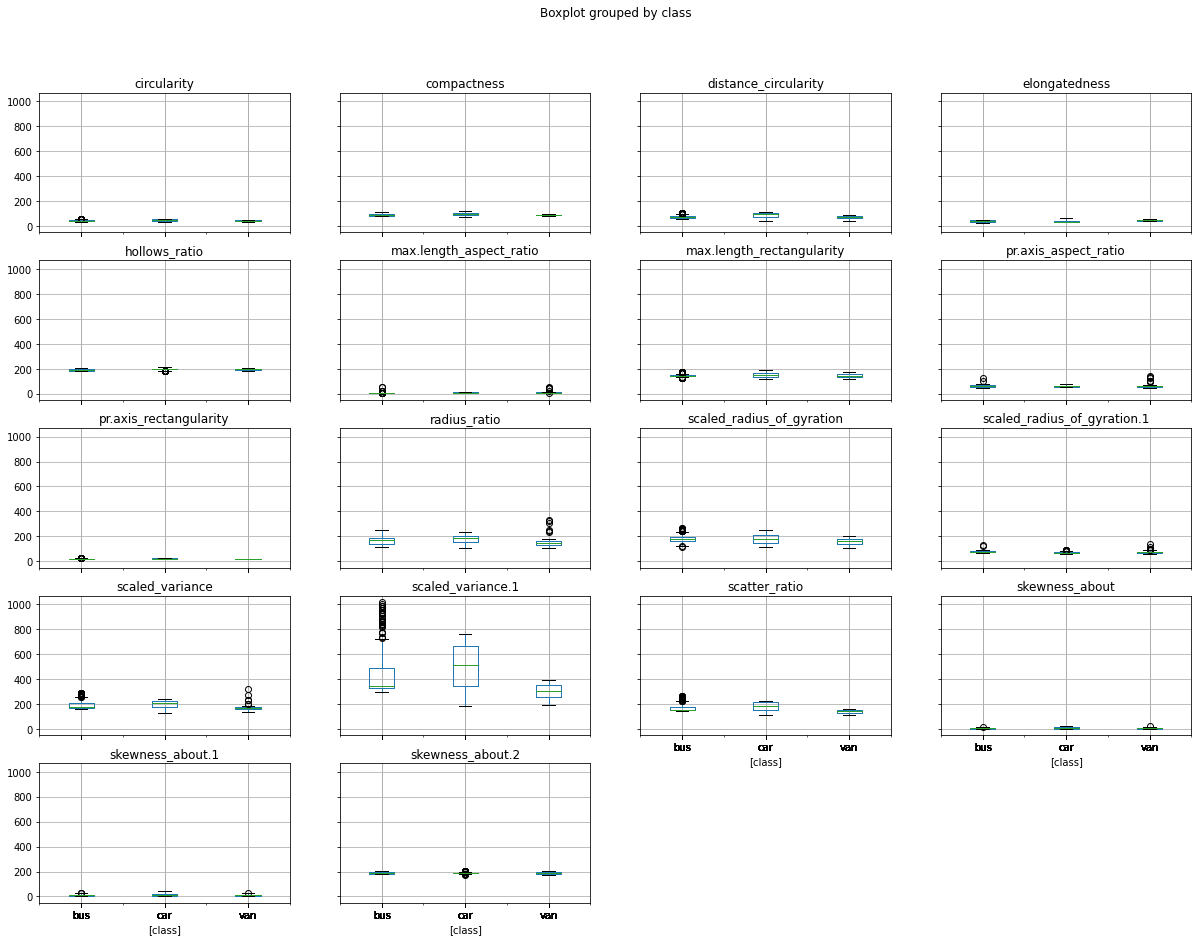

In [858]:
df3.boxplot(by = 'class',layout=(5,4), figsize=(20, 15))

There are some features like 'max.length_rectangularity','scaled_radius_of_gyration', 'radius ratio' and 'Scaled_variance.1' which are quite different for Bus, Car and Van

**Standardising the data and applying SVM**

In [859]:
X = df3.drop('class', axis=1)
y=df3['class']

In [860]:
#Applying the standardisation
X_sc = pd.DataFrame(StandardScaler().fit_transform(X))
X_sc.columns=X.columns

In [861]:
X_sc.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [862]:
#splitting the original data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_sc,y, test_size = 0.3, random_state = 10)

In [863]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
print ('SVM training score on the all the components before PCA', SVM_model.score(X_train, y_train))
print ('SVM test score on the all the components before PCA', SVM_model.score(X_test, y_test))

SVM training score on the all the components before PCA 0.9746621621621622
SVM test score on the all the components before PCA 0.9606299212598425


**PCA**

In [864]:
pca_model = PCA(n_components=18)
pca_model.fit(X_sc)

PCA(n_components=18)

In [865]:
print(pca_model.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [866]:
print(pca_model.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


In [867]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549, 0.97335049, 0.98226265, 0.98735979,
       0.99104984, 0.9936357 , 0.99562195, 0.99714304, 0.99828498,
       0.99927917, 0.9998355 , 1.        ])

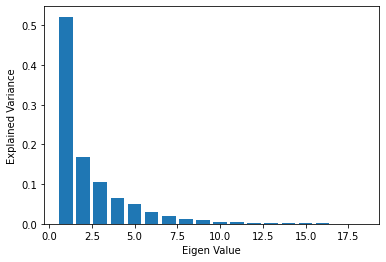

In [868]:
plt.bar(list(range(1,19)),pca_model.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Eigen Value')
plt.show()

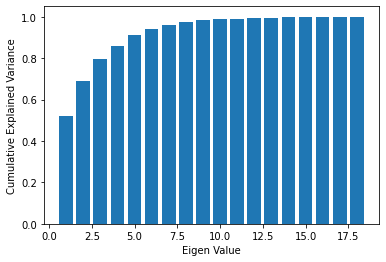

In [869]:
plt.bar(list(range(1,19)),np.cumsum(pca_model.explained_variance_ratio_),alpha=1, align='center')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Eigen Value')
plt.show()

In [870]:
((np.cumsum(pca_model.explained_variance_ratio_))<=0.99).sum()

10

If the cumulative explained variance is considered 99%, then the first 10 components will be enough. If only 95% is considered, 6 compenents wilbe enough

In [871]:
pca_model_f = PCA(n_components=10)
pca_model_f.fit(X_sc)
print(pca_model_f.explained_variance_ratio_)

#Transformed X components after PCA
Xpca_f = pd.DataFrame(data=pca_model_f.transform(X_sc),columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


**Applying SVM on PCA components**

In [872]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca_f,y, test_size = 0.3, random_state = 10)

In [873]:
SVM_model.fit(X_train_pca, y_train_pca)
print ('SVM training score on the 10 components after PCA', SVM_model.score(X_train_pca, y_train_pca))
print ('SVM test score on the 10 components after PCA', SVM_model.score(X_test_pca, y_test_pca))

SVM training score on the 10 components after PCA 0.9628378378378378
SVM test score on the 10 components after PCA 0.9448818897637795


**Conclusion**

From the above info, it is known even after reducing the components to 10 from 18, train accuracy is reduced by just 1% and test accuracy by 2%. This saves a lot of computation time as nearly half of the compenents are dropped.

After performing the PCA on RGB components with just 10 principal components, (96 to 97)% of variance is explained.

Now these RGB components are of size 3* 183 * 10 bytes size.

That means 1 color component is reduced by 50325-1830=48495 bytes.i.e.;96% reduction in storage memory. and computation time also reduces.